In [62]:
import folium
import pandas as pd
import numpy as np
import json
import statistics
import matplotlib.pyplot as plt


In [107]:
# Read population data from Excel file
house_df_queens = pd.read_excel('D:/PyCharm/pythonProject/143/Project/Housing_Price/09_15/2015_queens.xls',skiprows=4)
house_df_statenisland = pd.read_excel('D:/PyCharm/pythonProject/143/Project/Housing_Price/09_15/2015_statenisland.xls',skiprows=4)
house_df_manhattan = pd.read_excel('D:/PyCharm/pythonProject/143/Project/Housing_Price/09_15/2015_manhattan.xls',skiprows=4)
house_df_brooklyn = pd.read_excel('D:/PyCharm/pythonProject/143/Project/Housing_Price/09_15/2015_brooklyn.xls',skiprows=4)
house_df_bronx = pd.read_excel('D:/PyCharm/pythonProject/143/Project/Housing_Price/09_15/2015_bronx.xls',skiprows=4)

print(house_df_bronx.columns)


Index(['BOROUGH\n', 'NEIGHBORHOOD\n', 'BUILDING CLASS CATEGORY\n',
       'TAX CLASS AT PRESENT\n', 'BLOCK\n', 'LOT\n', 'EASE-MENT\n',
       'BUILDING CLASS AT PRESENT\n', 'ADDRESS\n', 'APARTMENT NUMBER\n',
       'ZIP CODE\n', 'RESIDENTIAL UNITS\n', 'COMMERCIAL UNITS\n',
       'TOTAL UNITS\n', 'LAND SQUARE FEET\n', 'GROSS SQUARE FEET\n',
       'YEAR BUILT\n', 'TAX CLASS AT TIME OF SALE\n',
       'BUILDING CLASS AT TIME OF SALE\n', 'SALE PRICE\n', 'SALE DATE\n'],
      dtype='object')


In [115]:
# Convert population data to a dictionary
price_df_queens = house_df_queens['SALE PRICE\n'].tolist()
# Remove all occurrences of 0 from the list, and delete too-small values
price_df_queens = [val for val in price_df_queens if 1000 <= val <= 5000000]

# Convert population data to a dictionary
price_df_statenisland = house_df_statenisland['SALE PRICE\n'].tolist()
# Remove all occurrences of 0 from the list, and delete too-small values
price_df_statenisland = [val for val in price_df_statenisland if 1000 <= val <= 5000000]

# Convert population data to a dictionary
price_df_manhattan = house_df_manhattan['SALE PRICE\n'].tolist()
# Remove all occurrences of 0 from the list, and delete too-small values
price_df_manhattan = [val for val in price_df_manhattan if 1000 <= val <= 10000000]

# Convert population data to a dictionary
price_df_brooklyn = house_df_brooklyn['SALE PRICE\n'].tolist()
# Remove all occurrences of 0 from the list, and delete too-small values
price_df_brooklyn = [val for val in price_df_brooklyn if 1000 <= val <= 5000000]


# Convert population data to a dictionary
price_df_bronx = house_df_bronx['SALE PRICE\n'].tolist()
# Remove all occurrences of 0 from the list, and delete too-small values
price_df_bronx = [val for val in price_df_bronx if 1000 <= val <= 6000000]




In [91]:
# Find max, min, mean, upper/lower quantile of housing price
max_queens = max(price_df_queens)
min_queens = min(price_df_queens)
mean_queens = int(statistics.mean(price_df_queens))
lower_quantile_queens = statistics.quantiles(price_df_queens, n=4)[0] # 25th percentile
upper_quantile_queens = statistics.quantiles(price_df_queens, n=4)[2]  # 75th percentile
print("Max:", max_queens)
print("Min:", min_queens)
print("Mean:", mean_queens)
print("Lower Quantile (25th percentile):", lower_quantile_queens)
print("Upper Quantile (75th percentile):", upper_quantile_queens)

Max: 49124685
Min: 1000
Mean: 664131
Lower Quantile (25th percentile): 252000.0
Upper Quantile (75th percentile): 687500.0


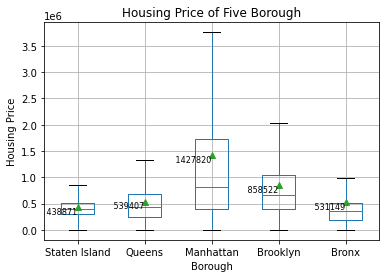

In [130]:

data = {
    'Staten Island': price_df_statenisland,
    'Queens': price_df_queens,
    'Manhattan': price_df_manhattan,
    'Brooklyn': price_df_brooklyn,
    'Bronx': price_df_bronx
}

# Find the maximum length among the columns and Pad the shorter columns with NaN
max_length = max(len(values) for values in data.values())

for key, values in data.items():
    data[key] = values + [np.nan] * (max_length - len(values))


df = pd.DataFrame(data)

# Create a boxplot using Pandas
boxplot = df.boxplot(showmeans=True, showfliers=False, grid=True, column=['Staten Island', 'Queens','Manhattan','Brooklyn','Bronx'])

# Calculate means for each category
means = df.mean()

# Annotate the boxplot with mean values (display only the integer part of the mean)
for i, col in enumerate(df.columns):
    mean_int = int(means[col])  # Get the integer part of the mean
    plt.text(i + 1, means[col], f' {mean_int}', ha='right', va='top', color='black', fontsize = 8)



# Add labels
plt.xlabel('Borough')
plt.ylabel('Housing Price')
plt.title('Housing Price of Five Borough')

plt.show()